# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## Problem Statement
* There are three types of offers: buy-one-get-one (BOGO), discount, and informational. In a BOGO offer, a user needs to spend a certain amount to get a reward equal to that threshold amount. In a discount, a user gains a reward equal to a fraction of the amount spent. In an informational offer, there is no reward, but neither is there a required amount that the user is expected to spend. Offers can be delivered via multiple channels.
* We will find answer to the following questions in this notebook.
   <br> Q. 1 What is the proportion of client who have completed the offers based on Gender, age and income levels?
     <br> Here we will analyze the data
   <br> Q. 2 What are the most important features that help drive the offers in customers?
     <br> For this we will train the model using classifiers by divinding the dataset in to train and test and use the train model to predict the outcomes on test data set

In [41]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

from sklearn.metrics import fbeta_score, accuracy_score, f1_score
from time import time
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

import tensorflow as tf
import keras

In [43]:
print(portfolio.head(),portfolio.shape)

                       channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5   (10, 6)


In [4]:
print(profile.head(),profile.shape)

   age  became_member_on gender                                id    income
0  118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783       NaN
1   55          20170715      F  0610b486422d4921ae7d2bf64640c50b  112000.0
2  118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5       NaN
3   75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef  100000.0
4  118          20170804   None  a03223e636434f42ac4c3df47e8bac43       NaN (17000, 5)


In [5]:
print(transcript.head(),transcript.shape)

            event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}   (306534, 4)


## Data Exploration

### Explore different offers using portfolio dataframe

In [6]:
def preprocess_portfolio(df=portfolio):
    """
    Takes the dataframe portfolio and cleans it by creating one-hot encodings.
    
    PARAMETERS:
        portfolio dataframe
        
    RETURNS:
        A new dataframe consisting of:
        - One-hot Enncoded channels and offer_type column   
        ["offer_id", "difficulty", "duration", "reward", "email", "mobile", "social", "web", "bogo", "discount", "informational"]
    """
    
    # One-hot encode channels column
    channels = portfolio["channels"].str.join(sep="*").str.get_dummies(sep="*")
    #channels = pd.get_dummies(portfolio["channels"].str,prefix='chn')

    # One-hot encode offer_type column
    offer_type = pd.get_dummies(portfolio['offer_type'],prefix='offer')
    
    # Concat one-hot and df
    df = pd.concat([df, channels, offer_type], axis=1, sort=False)
    
    df = df.rename(columns={'id':'offer_id'})

    
    # Remove channels and offer_type
    df = df.drop(['channels', 'offer_type'], axis=1)
    
    # Organize columns
    columns = ["offer_id", "difficulty", "duration", "reward", "email", "mobile", "social", "web", "offer_bogo", "offer_discount", "offer_informational"]
    df = df[columns]
    
    return df

In [7]:
preprocessed_portfolio= preprocess_portfolio() 
preprocessed_portfolio

,offer_id,difficulty,duration,reward,email,mobile,social,web,offer_bogo,offer_discount,offer_informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,3,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,2,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,3,0,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,7,2,1,1,0,1,0,1,0


In [8]:
#portfolio1 = portfolio.copy()
#temp_dummy = pd.get_dummies(portfolio1.channels.apply(pd.Series).stack()).sum(level=0)
#portfolio1 = pd.concat([portfolio1, temp_dummy], axis=1)
#portfolio1 = portfolio1.drop(columns='channels')
#portfolio1 = portfolio1.rename(columns={'id':'offer_id'})
#print(portfolio1)

### Exploring customer profile data

In [9]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [10]:
def preprocess_profile(profile = profile):
    """
    Takes the dataframe profile and cleans it by creating one-hot encodings as well as handling null values and  error age value 118.
    
    PARAMETERS:
        Profile dataframe.
        
    RETURNS:
        A new dataframe whithout income values iqual to null and age iqual to 118 as well as one hot encoded columns.
    """
    # drop lines with income = nan and age == 118
    df = profile.drop(profile[(profile["income"].isnull()) & (profile["age"] == 118)].index)
    
    # One-hot encode Gender column
    gender_dummies = pd.get_dummies(df["gender"])
    
    # Specifying age range and one hot encoding
    range_ages = pd.cut(x=df["age"], bins=[18, 20, 30, 40, 50, 60, 70, 80, 90, 100, 102])
    # One-hot encode ages column
    ages_dummies = pd.get_dummies(range_ages,prefix='age')
    
    # Specifying income range and one hot encoding
   
    range_income = pd.cut(x=df["income"], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000,  120000])
    income_dummies = pd.get_dummies(range_income,prefix='income')
    

    # Concat
    df = pd.concat([df, ages_dummies, income_dummies, gender_dummies], axis=1, sort=False)
    
    # Dropping age,gender,income column
    df = df.drop(["age", "gender", "income"], axis=1)
    
    return df

In [11]:
preprocessed_profile = preprocess_profile()
preprocessed_profile.head(10)

,became_member_on,id,"age_(18, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]","age_(60, 70]","age_(70, 80]","age_(80, 90]",...,"income_(50000, 60000]","income_(60000, 70000]","income_(70000, 80000]","income_(80000, 90000]","income_(90000, 100000]","income_(100000, 110000]","income_(110000, 120000]",F,M,O
1,20170715,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,20170509,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,20180426,e2127556f4f64592b11af22de27a7932,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8,20180209,389bc3fa690240e798340f5a15918d5c,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12,20171111,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13,20170911,aa4862eba776480b8bb9c68455b8c2e1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
14,20140213,e12aeaf2d47d42479ea1c4ac3d8286c6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15,20160211,31dda685af34476cad5bc968bdb01c53,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
16,20141113,62cf5e10845442329191fc246e7bcea3,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
18,20171231,6445de3b47274c759400cd68131d91b4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#profile1 = profile.copy()
preprocessed_profile['became_member_on'] = pd.to_datetime(preprocessed_profile['became_member_on'], format='%Y%m%d')
preprocessed_profile = preprocessed_profile.rename(columns={'id':'customer_id'})

In [13]:
preprocessed_profile.head()

,became_member_on,customer_id,"age_(18, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]","age_(60, 70]","age_(70, 80]","age_(80, 90]",...,"income_(50000, 60000]","income_(60000, 70000]","income_(70000, 80000]","income_(80000, 90000]","income_(90000, 100000]","income_(100000, 110000]","income_(110000, 120000]",F,M,O
1,2017-07-15,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,2018-04-26,e2127556f4f64592b11af22de27a7932,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8,2018-02-09,389bc3fa690240e798340f5a15918d5c,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12,2017-11-11,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Explore Transactions data using Transcript

In [14]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [15]:
# Functions to create offer id and amount columns from the transcript table.
def create_offer_id_column(val):
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]
    
def create_amount_column(val):
    if list(val.keys())[0] in ["amount"]:
        return list(val.values())[0]

In [16]:
def preprocess_transcript(transcript = transcript):
    """
    Processed the Transcript table by adding segregating categorical columns and convertrting to one hot encoded value based columns.
    PARAMETERS:
        transcript dataframe
    
    RETURNS:
        Processed transcript  dataframe
    
    """
    #
    transcript['offer_id'] = transcript.value.apply(create_offer_id_column)
    transcript['amount'] = transcript.value.apply(create_amount_column)
    
    #  One-hot encode event column
    event = pd.get_dummies(transcript['event'])
    
    # Concat one-hot and df
    df = pd.concat([transcript, event], axis=1, sort=False)
    
    # Create and Drop Transaction
    transaction = df[df["transaction"]==1]
    df = df.drop(transaction.index)
    
    # Drop
    df = df.drop(columns = ["event","value", "amount", "transaction"])
    
    return df

In [17]:
preprocessed_transcript = preprocess_transcript()
preprocessed_transcript = preprocessed_transcript.rename(columns={'person':'customer_id'})
preprocessed_transcript.head(10)

,customer_id,time,offer_id,offer completed,offer received,offer viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0
5,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0
6,c4863c7985cf408faee930f111475da3,0,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,0,1,0
8,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
9,31dda685af34476cad5bc968bdb01c53,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0


## Data Preprocessing

In [18]:
def merge_tables():
    #  Merge processed portfolio and transcript
    merged_transcript = preprocessed_transcript.merge(preprocessed_portfolio[preprocessed_portfolio.columns])
    
    # Merge profile with transcript on person column
    merged_transcript = merged_transcript.merge(preprocessed_profile[preprocessed_profile.columns])
    
    # Rename columns
    columns_names = ['customer_id', 'time', 'offer_id',  'offer completed', 'offer received',' offer viewed', 
 'difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web', 'offer_bogo', 'offer_discount', 'offer_informational','became_member_on',
 "age_18-20", "age_20-30", "age_30-40", "age_40-50", "age_50-60", "age_60-70", "age_70-80", "age_80-90", "age_90-100", "age_100-102", "income_30-40K", "income_40-50K", "income_50-60K",
 "income_60-70K", "income_70-80K", "income_80-90K", "income_90-100K", "income_100-110K", "income_110-120K", 
 'F', 'M', 'O']
    merged_transcript.columns = columns_names
    
    # Re-organize columns
    cols_order = ['customer_id', 'offer_id', 'time', 
          'difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web', 'offer_bogo', 'offer_discount', 'offer_informational',
          'became_member_on',
          "age_18-20", "age_20-30", "age_30-40", "age_40-50", "age_50-60", "age_60-70", "age_70-80", "age_80-90", "age_90-100", "age_100-102", 'F', 'M', 'O', "income_30-40K", "income_40-50K", "income_50-60K",
 "income_60-70K", "income_70-80K", "income_80-90K", "income_90-100K", "income_100-110K", "income_110-120K", 
          'offer received',' offer viewed', 'offer completed'     
         ]     
    return merged_transcript[cols_order]

In [19]:
merged_transcript = merge_tables()

In [20]:
merged_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 148804
Data columns (total 39 columns):
customer_id            148805 non-null object
offer_id               148805 non-null object
time                   148805 non-null int64
difficulty             148805 non-null int64
duration               148805 non-null int64
reward                 148805 non-null int64
email                  148805 non-null int64
mobile                 148805 non-null int64
social                 148805 non-null int64
web                    148805 non-null int64
offer_bogo             148805 non-null uint8
offer_discount         148805 non-null uint8
offer_informational    148805 non-null uint8
became_member_on       148805 non-null datetime64[ns]
age_18-20              148805 non-null uint8
age_20-30              148805 non-null uint8
age_30-40              148805 non-null uint8
age_40-50              148805 non-null uint8
age_50-60              148805 non-null uint8
age_60-70              

### Feature Description 
Lets take a final look at what our column in the dataframe means before answering our Primary questions.   
* Customer id
* offer_id - Offer Registration ID of customers
* time - Time since start of the test. The data begins at time t=0 and is displayed in HOURS
* difficulty - Minimum required spend to complete an offer
* duration - Time for offer to be open, in DAYS
* reward - Reward given for completing an offer
* email, mobile, social, web - Channel where offer was offered
* bogo(buy-one-get-one) , informational, discount - types of offer.
* became_member_on - date when customer created an app account
* age_18-102 - Age range of Customers
*  F, M , O - Gender of Customers
* income_30k- 120k -- customer income Range
* Offer recieved - Description 
* Offer viewed - Description
* Offer completed - Target Feature

<br> Q. 1 What is the proportion of client who have completed the offers based on Gender, age and income levels?

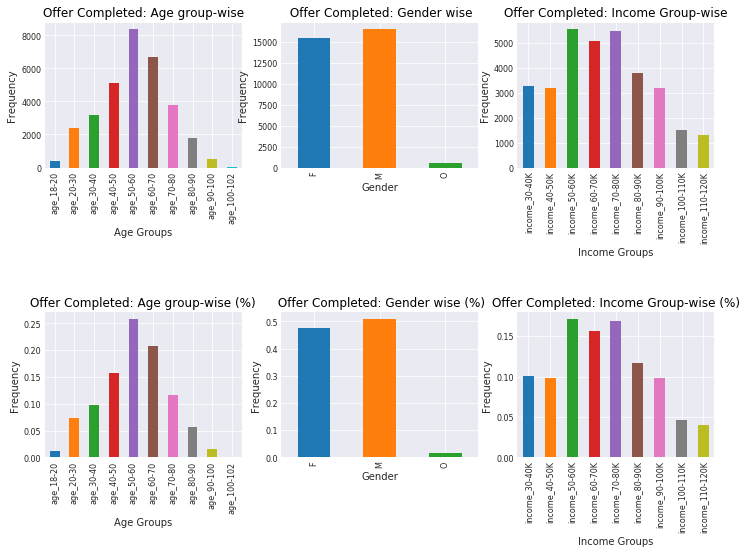

In [21]:
#Creating Subplots for distribution based on Gender,Age and Income for the Newly cleaned Profile data
sns.set_style('darkgrid')
fig,ax= plt.subplots(2,3,figsize=(12,8))
plt.subplots_adjust(hspace = 1)
#fig.tight_layout()

# AGE-Group based distribution
age_cols=["age_18-20", "age_20-30", "age_30-40", "age_40-50", "age_50-60", "age_60-70", "age_70-80", "age_80-90", "age_90-100", "age_100-102"]
merged_transcript[merged_transcript['offer completed']==1][age_cols].sum().plot.bar(ax=ax[0,0],fontsize=8)
ax[0,0].set_title("Offer Completed: Age group-wise", fontsize=12,color='black')
ax[0,0].set_xlabel("Age Groups", fontsize=10)
ax[0,0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# GENDER based distribution
merged_transcript[merged_transcript['offer completed']==1][['F','M','O']].sum().plot.bar(ax=ax[0,1],fontsize=8)
ax[0,1].set_title(" Offer Completed: Gender wise", fontsize=12,color='black')
ax[0,1].set_xlabel("Gender", fontsize=10)
ax[0,1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)


# INCOME-Group based distribution
income_cols=["income_30-40K", "income_40-50K", "income_50-60K", "income_60-70K", "income_70-80K", "income_80-90K", "income_90-100K", "income_100-110K", "income_110-120K"]
merged_transcript[merged_transcript['offer completed']==1][income_cols].sum().plot.bar(ax=ax[0,2],fontsize=8)
ax[0,2].set_title("Offer Completed: Income Group-wise", fontsize=12,color='black')
ax[0,2].set_xlabel("Income Groups", fontsize=10)
ax[0,2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# AGE-Group based distribution in Percentage
age_cols=["age_18-20", "age_20-30", "age_30-40", "age_40-50", "age_50-60", "age_60-70", "age_70-80", "age_80-90", "age_90-100", "age_100-102"]
merged_transcript[merged_transcript['offer completed']==1][age_cols].mean().plot.bar(ax=ax[1,0],fontsize=8)
ax[1,0].set_title("Offer Completed: Age group-wise (%)", fontsize=12,color='black')
ax[1,0].set_xlabel("Age Groups", fontsize=10)
ax[1,0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# GENDER based distribution in precentage
merged_transcript[merged_transcript['offer completed']==1][['F','M','O']].mean().plot.bar(ax=ax[1,1],fontsize=8)
ax[1,1].set_title(" Offer Completed: Gender wise (%)", fontsize=12,color='black')
ax[1,1].set_xlabel("Gender", fontsize=10)
ax[1,1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)


# INCOME-Group based distribution in percentage
income_cols=["income_30-40K", "income_40-50K", "income_50-60K", "income_60-70K", "income_70-80K", "income_80-90K", "income_90-100K", "income_100-110K", "income_110-120K"]
merged_transcript[merged_transcript['offer completed']==1][income_cols].mean().plot.bar(ax=ax[1,2],fontsize=8)
ax[1,2].set_title("Offer Completed: Income Group-wise (%)", fontsize=12,color='black')
ax[1,2].set_xlabel("Income Groups", fontsize=10)
ax[1,2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)
plt.show()



A. 1 As seen from the figure above, customers in the age group 40–80 have higher offer completion constituting nearly 75% of the offers completed. Also, customers in the income group 50K - 80K have a higher percentage of offer completion. There is no clear distinction between males and females as both are represented equally in the offer completed group

In [22]:
# Since we are interested in transactions with offer completion, remove transaction data with other attributes
merged_transcript1 = merged_transcript.drop(["offer received", ' offer viewed', 'offer_informational', "became_member_on"], axis=1)

# Split the data into feaures and target labels
target = merged_transcript1['offer completed']
features = merged_transcript1.drop('offer completed', axis = 1)
print(" Total number of features: {} ".format(len(features.columns)))

 Total number of features: 34 


In [23]:
# Initialize scaler and apply it to features
scaler = MinMaxScaler() # default=(0, 1)

numerical_columns = features.columns[2:6]

features_minmax_transform = pd.DataFrame(data = features)
features_minmax_transform[numerical_columns] = scaler.fit_transform(features[numerical_columns])
features_final = features_minmax_transform[features_minmax_transform.columns[2:]]
features_final.head()

,time,difficulty,duration,reward,email,mobile,social,web,offer_bogo,offer_discount,...,O,income_30-40K,income_40-50K,income_50-60K,income_60-70K,income_70-80K,income_80-90K,income_90-100K,income_100-110K,income_110-120K
0,0.000000,0.25,0.571429,0.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.008403,0.25,0.571429,0.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.184874,0.25,0.571429,0.5,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.705882,0.25,0.285714,0.5,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.714286,0.25,0.285714,0.5,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 42,
                                                   stratify=target)

# Display result after splitting..
print("results of the split\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

print("\nclass distribution\n")
print('train set distribution for targets')
print(y_train.value_counts(normalize=True))
print('test class distribution for targets')
print(y_test.value_counts(normalize=True))

results of the split

Training set has 119044 samples.
Testing set has 29761 samples.

class distribution

train set distribution for targets
0    0.781971
1    0.218029
Name: offer completed, dtype: float64
test class distribution for targets
0    0.781963
1    0.218037
Name: offer completed, dtype: float64


## Model Evaluation

In [25]:
accuracy = accuracy_score(y_train,np.ones(len(y_train)))
fscore = fbeta_score(y_train,np.ones(len(y_train)), beta=0.5)

# Print the results 
print("Naive Predictor: Accuracy score: {:.4f}, fscore: {:.4f}".format(accuracy, fscore))

Naive Predictor: Accuracy score: 0.2180, fscore: 0.2584


In [26]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    Takes a learning algorithm and uses it to train and predict the samples and returns the performance.
    
    PARAMETERS:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: label training set
       - X_test: features testing set
       - y_test: label testing set
    RETURNS
        Performance results for the learning algorithm.
    '''
    
    results = {}
    
    #  Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end - start
        
    #  Get the predictions on the test set(X_test), and the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    #  Compute accuracy for first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    #  Compute accuracy for test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #  Compute F1 score on the the first 300 training samples using f_score()
    results['f_train'] = f1_score(y_train[:300], predictions_train)
        
    # Compute F1 score on the test set which is y_test
    results['f_test'] = f1_score(y_train[:300], predictions_train)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [31]:
def evaluate(results, accuracy, f1):
    """
    Uses performance of various learning algorithms to produce visualizations.
    
    PARAMETERS:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    RETURNS:
         NONE
    """
   
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['red','blue','green']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Data Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training Time")
    ax[0, 1].set_title("Accuracy Score on Training set")
    ax[0, 2].set_title("F1 score on Training set")
    ax[1, 0].set_title("Model Prediction Time")
    ax[1, 1].set_title("Accuracy Score on Test set")
    ax[1, 2].set_title("F1 score on Test Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance metrics comparison for supervised learning models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

DecisionTreeClassifier trained on 1190 samples.
DecisionTreeClassifier trained on 11904 samples.
DecisionTreeClassifier trained on 119044 samples.
GaussianNB trained on 1190 samples.
GaussianNB trained on 11904 samples.
GaussianNB trained on 119044 samples.
RandomForestClassifier trained on 1190 samples.
RandomForestClassifier trained on 11904 samples.
RandomForestClassifier trained on 119044 samples.


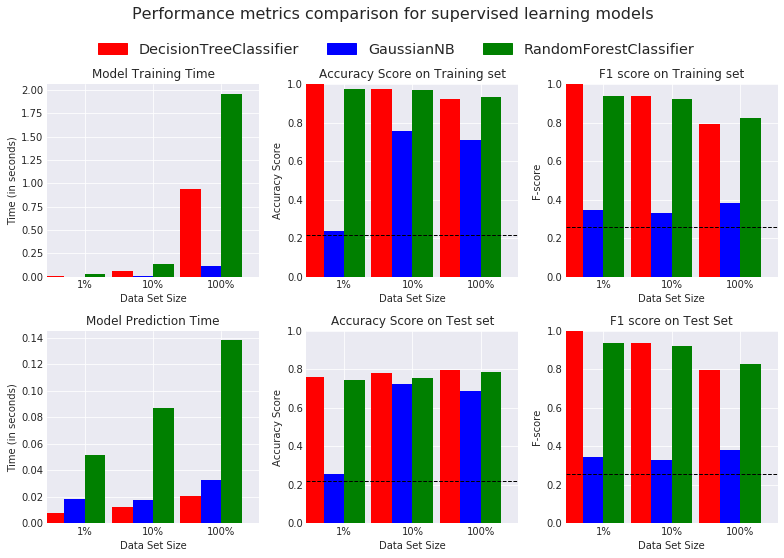

In [32]:
#  Initializing the three models
clf_A = DecisionTreeClassifier(random_state =42) #DecisionTree
clf_B = GaussianNB() #NainveBayes
# n_estimators=10 is a default parameter. Necessary for not error message. 
clf_C = RandomForestClassifier(random_state =42, n_estimators=10) #EnsembleMethods 

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 =  int(len(y_train))
samples_10 =  int((samples_100 * 10/100))
samples_1 =   int((samples_100 * 1)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

Random Forest Classifier works best (Marginally better compared to  in this case its performance score on Test Set is:
Accuracy score on testing data: 0.7881
We can improve this model even more if we could find out the best hyperparameters for the mode. Luckily, GridSearchCV can help us achieve that.

In [33]:
#  Initialize the classifier
clf = RandomForestClassifier(random_state =42, n_estimators=20)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_features':['auto', 'sqrt'], 'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]} 

#  Make an fbeta_score scoring object using make_scorer()
beta= 0.01
#scorer = make_scorer(fbeta_score, beta=beta)
scorer = make_scorer(precision_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, cv=3, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = beta)))
print("\nOptimized Model\n")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = beta)))

Unoptimized model

Accuracy score on testing data: 0.7877
F-score on testing data: 0.5167

Optimized Model

Final accuracy score on the testing data: 0.7951
Final F-score on the testing data: 0.6143


In [68]:
# Print Confusion Matrix
true_nagatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, best_predictions).ravel()
con_mtx = np.array([[true_positives, false_negatives],[false_positives, true_nagatives]])
con_mtx

array([[ 1047,  5442],
       [  657, 22615]])

In [69]:
precision, recall, support, nada = precision_recall_fscore_support(y_test, best_predictions, average='binary', pos_label=1)
print(f"The precision of model is {precision:0.4f}.")
print(f"The recall of model is {recall:0.4f}.")

The precision of model is 0.6144.
The recall of model is 0.1613.


In [70]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Provided a sklearn confusion matrix, visualizes the matrix.

    PARAMETERS
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Wistia')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

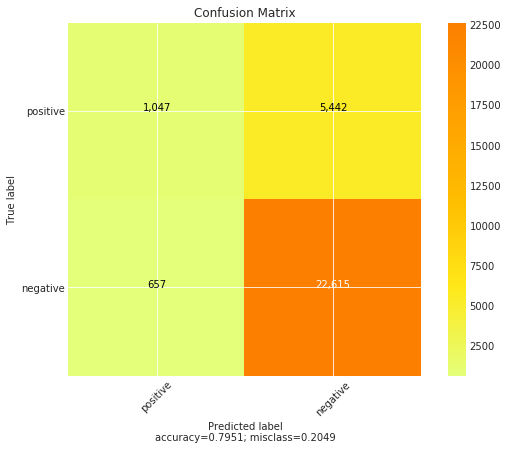

In [71]:
plot_confusion_matrix(cm           = con_mtx, 
                      normalize    = False,
                      target_names = ['positive', 'negative'],
                      title        = "Confusion Matrix")

In [72]:
#Best classifier
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [39]:
def feature_plot(importances, X_train, y_train, n=5):
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:n]]
    values = importances[indices][:n]

    # Creat the plot
    fig = pl.figure(figsize = (12,6))
    pl.title(f"Normalized Feature Weights for Top {n} Predictive Features", fontsize = 16)
    pl.bar(np.arange(n), values, width = 0.6, align="center", color = 'green')
    #pl.bar(np.arange(n) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = 'blue', \
          #label = "Cumulative Feature Weight")
    pl.xticks(np.arange(n), columns)
    #pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper left')
    pl.tight_layout()
    sns.despine(bottom=True, left=True)
    pl.show()

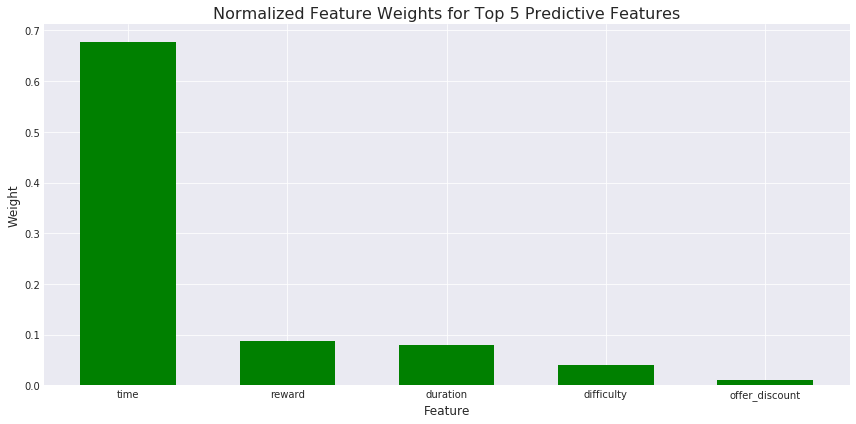

In [40]:
# Import a supervised learning model that has 'feature'

#  Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf.fit(X_train, y_train)

#  Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train, 5)

## Conclusion and Future Scope
The work here describes an approach towards analyzing the promotional offer transaction data along with customer profile data and using it to provide offers to improve its completion in the future. Best results are provided by Random forest classifier with an accuracy score of 0.795. However, there is scope to improve the recommendations through the use of a better model, more data, and model tuning.